# 第10回 機械学習入門1 線形回帰モデル

## 機械学習に関する参考書
理論については

- Bishop, C. M. (2016): Pattern Recognition and Machine Learning, Springer.（「パターン認識と機械学習 上・下」 丸善出版）.
- Hastie, T., R. Tibshirani, and J. Friedman. (2013): The Elements of Statistical Learning, 2nd Edition, Springer.（「統計的学習の基礎」共立出版）
- Goodfellow, I., Y. Bengio, and A. Courville. (2016): Deep Learning, MIT Press.（「深層学習」KADOKAWA）

など。

Pythonで実装しながら、理論についてもある程度説明した本として

- Géron, A. (2019): Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow, 2nd Edition, O'Reilly.（ 「scikit-learn、Keras、TensorFlowによる実践機械学習 第2版」 オライリー）
- Muller, A. C., S. Guido. (2016): Introduction to Machine Learning with Python, O'Reilly.（「Pythonではじめる機械学習」オライリー）
- Raschka, S., V. Mirjalili.(2019): Python Machine Learning: Machine Learning and Deep Learning with Python, 3rd Edition, Packt Publishing. （「Python機械学習プログラミング 第3版」インプレス）

など。Pythonの機械学習系ライブラリ（scikit-learn, numpy, pandas等）は頻繁にバージョンアップするので、本と併せてマニュアルも見たほうがよい。


## 機械学習とは何か

データに潜んでいる法則性を見つけ出し、それに基づいた予測や判断を行うためのアルゴリズムの総称を機械学習という。
Mitchell(1997)※は機械（コンピュータプログラム）が学習をするとは、
経験$E$を通じてタスク$T$のパフォーマンス$P$が向上すること、
と定義している。
この定義によれば、機械学習の基本的な構成要素はタスク$T$、
パフォーマンス尺度$P$、経験$E$ということになる。
タスク$T$とは例えば、不動産の価格予測、画像認識であり、
経験$E$とは過去に取得された不動産価格やその不動産の属性データ、画像データである。
パフォーマンス尺度$P$は例えば、予測された不動産価格と真の値との差や画像認識の正答率のような、誤差を計測する尺度である。

※ Mitchell, T. M. (1997): Machine Learning, McGraw-Hill.

機械学習にはいくつかの分類があり、つぎの3つに分類されることが多い。

- 教師あり学習
- 教師なし学習
- 強化学習

本講義では教師あり学習を扱う。

教師あり学習では、まず$N$個のデータのペア
$\{(\mathbf{x}_i,y_i)\}_{i=1,2,\ldots,N}$
が与えられる。
これらを訓練データと呼ぶ．
ここで $\mathbf{x}_i$ は特徴量と呼ばれる入力データ（ベクトル）、$y_i$ は $\mathbf{x}_i$ に対応する正解（またはラベル）と呼ばれる出力データを表す。
教師あり学習では訓練データから特徴量$\mathbf{x}$と正解$y$の対応関係を表す関数 $f$（$y=f(\mathbf{x})$）を推定することが目標となる。

$y$が連続値を取るとき、このタスクを回帰という。
例えば、$y$が不動産価格で、$\mathbf{x}$ が最寄り駅からの距離や建築年数などの属性データであるとき、$\mathbf{x}$ から $y$ を推定する問題が回帰である。

一方、$y$ が離散的なデータ、例えば $y$ が $0$ または $1$ の値をとるとき、このタスクを分類という。
例えば、$\mathbf{x}$ が動物の画像データであり、$y$ が犬か（$y=1$）、そうでないか（$y=0$）を表すような場合である。

教師あり学習の多くのアルゴリズムでは関数 $f$ を直接推定するのではなく、
パラメータ化された関数 $f(\mathbf{x};\mathbf{w})$ を考え、
パラメータ $\mathbf{w}$ を推定する問題に帰着させる。
本講義でもパラメータ化された関数の推定のみを扱う。

パフォーマンス尺度$P$は何らかの誤差によって定義される。
この誤差を表す関数を損失関数と呼ぶことにしよう。
パラメータ化された関数$f(\mathbf{x};\mathbf{w})$を考えるときには、
損失関数はパラメータ $\mathbf{w}$ の関数 
$L\left(\mathbf{w}\right)$ となる。
モデルを$y=f(\mathbf{x}; \mathbf{w})$としたときの、
個々の訓練データ $(\mathbf{x}_i,y_i)$ の誤差を関数 $l$ を用いて $l(\mathbf{x}_i,y_i;\mathbf{w})$ と表現すれば、損失関数は

$$
  L(\mathbf{w}) = \frac{1}{N}\sum_{i=1}^N l(\mathbf{x}_i, y_i; \mathbf{w})
$$

と書くことができる。
例えば、誤差を二乗誤差により定義すると、

$$
  L(\mathbf{w}) = \frac{1}{N}\sum_{i=1}^N \{y_i - f(\mathbf{x}_i; \mathbf{w})\}^2
$$

が損失関数となる。
そして、最適化問題

$$
  \min_\mathbf{w}\ L(\mathbf{w})  
$$

の解 $\mathbf{w}^\ast$ によって得られた関数 
$f(\mathbf{x};\mathbf{w}^\ast)$ が推定された関数となる。


## 線形回帰モデル

特徴量 $\mathbf{x} = (x_1, x_2, \dots, x_D)^T$ と正解 $y$ の間の関係をパラメータ $\mathbf{w}=(w_0,w_1,…,w_D )^T$ を用いて

$$ \tag{1}
  y = w_0 + w_1x_1 + \dots + w_Dx_D = w_0 + \sum_{i=1}^D w_i x_i 
$$

とするモデルを**線形回帰モデル**という。機械学習では $w_0$ をバイアスと呼ぶ。

パラメータ$\mathbf{x}$を改めて
$\mathbf{x} = (1, x_1, x_2, \dots, x_D)^T$ と定義すれば、
(1)は

$$ \tag{2}
y = \mathbf{w}^T\mathbf{x}
$$

と簡潔に書ける。

線形回帰モデルは統計学や計量経済学においてもよく用いられるモデルである。
しかし、統計学や計量経済学においては回帰係数 $w_i$ の統計的有意性や特徴量（説明変数）と正解（被説明変数）の間の相関関係または因果関係に主な関心がある一方、機械学習においては汎化誤差（後ほど定義する）の最小化、すなわち精度のよい予測をすることに主な関心がある。

訓練データを$\{(\mathbf{x}_i,y_i)\}_{i=1,2,\ldots,N}$とする。
$\mathbf{x}_i = (x_{i1}, x_{i2}, \dots, x_{iD})^T$である。
線形回帰では平均二乗誤差

$$\tag{3}
  L(\mathbf{w}) = \frac{1}{N}\sum_{i=1}^N\left(y_i - w_0 - \sum_{j=1}^Dw_jx_{ij}\right)^2 =\frac{1}{N}\sum_{i=1}^N\left(y_i - \mathbf{w}^T \mathbf{x}_i\right)^2
$$

を最小化する。
損失関数 $L(\mathbf{w})$ は凸関数であるため、
最小化問題 $\min_{\mathbf{w}}L(\mathbf{w})$の解は
$\nabla L(\mathbf{w})=0$ を解くことによって求めることができる。

(3)の解（正規方程式の解）は

$$ \tag{4}
  \mathbf{w}^* = \left(\mathbf{\Phi}^T \mathbf{\Phi} \right)^{-1} \mathbf{\Phi}^T \mathbf{y}
$$

と求まる。
ここで $\mathbf{y}=(y_1,y_2,…,y_N )^T$，

$$
  \mathbf{\Phi} =
  \left(
  \begin{array}{cccc}
    1 & x_{11} & \ldots & x_{1D} \\
    1 & x_{21} & \ldots & x_{2D} \\
    \vdots & \vdots & \ddots & \vdots \\
    1 & x_{N1} & \ldots & x_{ND}
  \end{array}  
  \right)
$$
である。

数学的には簡潔な解を求めることができるが，
機械学習ではデータ数 $N$ が非常に大きいことが通常であり、
その場合(4)の逆行列
$(\mathbf{\Phi}^T \mathbf{\Phi})^{-1}$を計算することは現実的でなく、実際には $\nabla L(\mathbf{w})=0$ の解を（確率的）勾配降下法を使って近似することが多い。


## 線形回帰モデル推定の実際

[scikit-learn](https://scikit-learn.org/stable/)
ライブラリを使って、Boston Housing Price Datasetを使って住宅価格の予測をする。
[データはこちらからダウンロード](https://drive.google.com/file/d/105PGKkTt3kWy1Q-AA25bWQPw8hiPTZcG/view?usp=sharing)
する。

Boston Housing Price Datasetの詳細については例えばつぎのサイトを見るとよい。https://www.kaggle.com/c/boston-housing

In [1]:
import pandas as pd
import numpy as np

Googleドライブをマウントした後、pandasの`read_csv()`を使ってデータを読み込む。

In [2]:
boston_df = pd.read_csv('./boston_housing_price.csv')

データの型を確認

In [3]:
print(type(boston_df))

<class 'pandas.core.frame.DataFrame'>


データの先頭を確認

In [4]:
boston_df.head()

,INDEX,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


欠損値がないか、基本統計量を調べ、各変数のヒストグラムを描く。

In [5]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   INDEX    506 non-null    int64  
 1   CRIM     506 non-null    float64
 2   ZN       506 non-null    float64
 3   INDUS    506 non-null    float64
 4   CHAS     506 non-null    int64  
 5   NOX      506 non-null    float64
 6   RM       506 non-null    float64
 7   AGE      506 non-null    float64
 8   DIS      506 non-null    float64
 9   RAD      506 non-null    int64  
 10  TAX      506 non-null    int64  
 11  PTRATIO  506 non-null    float64
 12  B        506 non-null    float64
 13  LSTAT    506 non-null    float64
 14  MEDV     506 non-null    float64
dtypes: float64(11), int64(4)
memory usage: 59.4 KB


In [6]:
boston_df.describe()

,INDEX,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2972131590>,
      dtype=object)

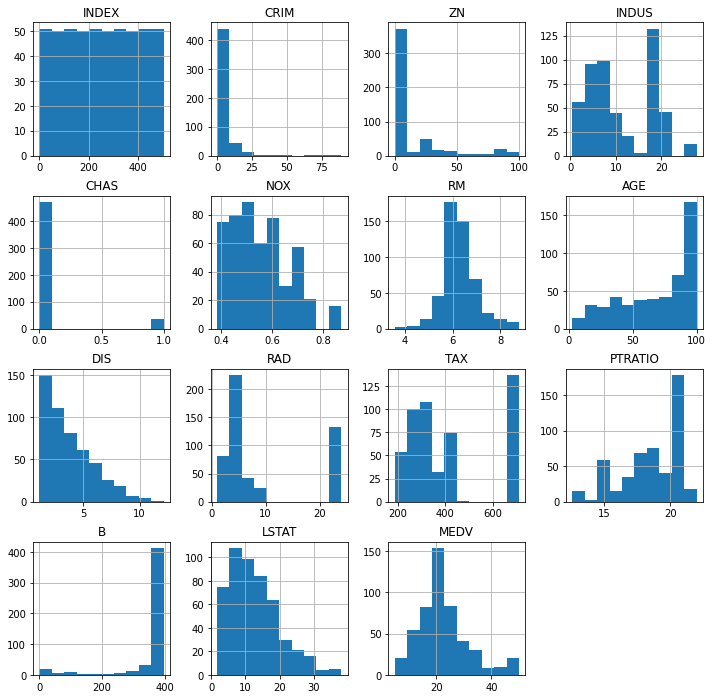

In [7]:
boston_df.hist(figsize=(12, 12))

`MEDV`が正解にあたる住宅価格、`CRIM`列から`LSTAT`列までが特徴量。`INDEX`は行名なので、後で削除する。

最小二乗法を実行するにはscikit-learnライブラリのLinearRegressionクラス https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
を使う。

In [8]:
from sklearn.linear_model import LinearRegression

特徴量と正解の定義

In [9]:
X_df = boston_df.drop(['INDEX', 'MEDV'], axis=1)
y_df = boston_df['MEDV']

`X_df`, `y_df`の先頭を確認

In [10]:
X_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [11]:
y_df.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV, dtype: float64

padasの`to_numpy()`メソッドにより、numpy配列に変換（やらなくてもよい？）

In [12]:
X_np = X_df.to_numpy()
y_np = y_df.to_numpy()

最小二乗法を実行

In [13]:
lnreg = LinearRegression()
lnreg.fit(X_np, y_np)

LinearRegression()

回帰係数を確認。切片$w_0$は`.intercept_`、係数$w_1, \dots, w_n$は`.coef_`という属性により取り出すことができる。

In [14]:
print(lnreg.intercept_)
print(lnreg.coef_)

36.45948838508978
[-1.08011358e-01  4.64204584e-02  2.05586264e-02  2.68673382e+00
 -1.77666112e+01  3.80986521e+00  6.92224640e-04 -1.47556685e+00
  3.06049479e-01 -1.23345939e-02 -9.52747232e-01  9.31168327e-03
 -5.24758378e-01]


つぎのようにすると回帰係数が見やすくなる。

In [15]:
colnames = X_df.columns
pd.DataFrame(lnreg.coef_, index=colnames)

,0
CRIM,-0.108011
ZN,0.046420
INDUS,0.020559
CHAS,2.686734
NOX,-17.766611
RM,3.809865
AGE,0.000692
DIS,-1.475567
RAD,0.306049
TAX,-0.012335


`.score()`メソッドによりスコア（決定係数）を計算する。決定係数は0以上1以下の値をとり、値が1に近いほどモデルのデータへの当てはまりがよいことを表す。

In [16]:
lnreg.score(X_np, y_np)

0.7406426641094095

## 訓練誤差と汎化誤差
訓練データへの当てはまりの良さ（悪さ）を**訓練誤差**と呼ぶ。
機械学習の目的は**未知**のデータに対する予測をすることであり、すでに手元にあるデータを良く説明することが目的ではない。
未知のデータへの当てはまりの良さ（悪さ）を**汎化誤差**という。つまり、機械学習の目的は汎化誤差を小さくすることである。

では、汎化誤差を計算するにはどうしたらよいか？ 未知のデータは当然入手することはできない。

手元にあるデータをすべて使ってモデルを推定するのではなく、データを訓練用のデータとテスト用のデータに分けて、

- 訓練用データを使ってモデルを推定する
- テスト用データを使ってスコアを計算する

という手続きをとる。

scikit-learn ライブラリの `train_test_split`関数 https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html を使うとデータを訓練用データとテスト用データに分けることができる。

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X_np, y_np, random_state=123)

`X_train`, `X_test`, `y_train`, `y_test`の大きさを見てみる。

In [19]:
print(X_train.shape)
print(X_test.shape)

(379, 13)
(127, 13)


`X_train` と `y_train` を使って回帰モデルを推定する。

In [20]:
lnreg1 = LinearRegression()
lnreg1.fit(X_train, y_train)

LinearRegression()

係数を表示

In [21]:
print(lnreg1.intercept_)
print(lnreg1.coef_)

32.4796648045322
[-9.78910352e-02  4.27789348e-02  5.91493507e-02  1.23149832e+00
 -1.54902558e+01  4.35215724e+00 -4.69136797e-04 -1.37720645e+00
  2.82085749e-01 -1.24919445e-02 -9.40011503e-01  6.62260713e-03
 -5.48551054e-01]


スコアを計算する。スコアはテスト用データを使って計算することに注意。

In [22]:
lnreg1.score(X_test, y_test)

0.6862448857295753

訓練データのスコアも計算しておく。

In [23]:
lnreg1.score(X_train, y_train)

0.7520477761303055

訓練誤差に比べて汎化誤差が大きいとき（訓練スコアに比べて汎化スコアが小さいとき）は**過学習**（over-fitting）が起こっている可能性がある。

さて、汎化誤差をさらに小さく（テストデータに対するスコアを大きく）するにはどうしたらよいか？

## 多項式回帰

汎化誤差を小さくするには、データを増やす、特徴量を増やす、あたりがまず思いつく。手持ちの特徴量からさらに特徴量を増やす方法として、**多項式回帰**がある。
例えば、特徴量が$x_1, x_2$の2つであるとき、2次の多項式回帰では
特徴量として$x_1, x_2, x_1^2, x_2^2, x_1x_2$を用いる。

scikit-learnの`PolynomialFeatures`クラスにより多項式を生成することができる。

In [24]:
from sklearn.preprocessing import PolynomialFeatures

In [25]:
poly = PolynomialFeatures(degree=2, include_bias=False)
poly.fit(X_np)
X_poly = poly.transform(X_np)

In [26]:
print(X_poly.shape)

(506, 104)


訓練データとテストデータに分ける。

In [27]:
Xp_train, Xp_test, y_train, y_test = train_test_split(X_poly, y_np)

回帰分析を実行

In [28]:
lnreg2 = LinearRegression()
lnreg2.fit(Xp_train, y_train)

LinearRegression()

スコアを表示

In [29]:
print(lnreg2.score(Xp_test, y_test))
print(lnreg2.score(Xp_train, y_train))

0.8623698437970826
0.9307487439235773


`PolynomialFeautres()`のオプションを`degree=3`（3次多項式）としたらどうなるか？

## 正則化

過学習を防ぐための方法として正則化がある。正則化にはRidge回帰、Lasso回帰、Elastic Net などがある。

### Ridge回帰（リッジ回帰）

線形回帰モデル
$$
y = w_0 + \sum_{i=1}^Dw_ix_i = \mathbf{w}^T\mathbf{x}
$$
のパラメータ $\mathbf{w}$ を求めるために、最小二乗法では損失関数

$$
L(\mathbf{w}) = \sum_{i=1}^N\left(y_i - w_0 - \sum_{j=1}^Dw_jx_{ij}\right)^2 =\sum_{i=1}^N\left(y_i - \mathbf{w}^T\mathbf{x}_i\right)^2
$$

を最小にする$\mathbf{w}$を求めた。

このとき、損失関数を

$$
L(\mathbf{w}) = \sum_{j=1}^N\left(y_i - w_0 - \sum_{i=1}^Dw_jx_{ij}\right)^2 + \alpha\sum_{j=1}^Dw_j^2
= \sum_{i=1}^N\left(y_i - \mathbf{w}^T\mathbf{x}_i\right)^2 + \alpha\|\mathbf{w}\|^2
$$

として、パラメータを求める手法を**Ridge回帰**という。
ここで、$\|\,\|$は２乗ノルム$\|w\| = \sqrt{\sum_{i=1}^Dw_j^2}$を表す。

損失関数に$\sum_{i=1}^Dw_i^2$（**正則化項**という）が加わることにより、なるべく**ゼロに近くなるように**パラメータ$w_1, w_2, \dots, w_D$が求められる。すなわち、それぞれの**特徴量**の影響をなるべく小さくしたモデルで正解を推定しようとすることになる。

$\alpha$は正則化項の強さを表す係数であり、分析者があらかじめ決めなければならないパラメータ（**ハイパーパラメータ**）である。
$\alpha$が大きいほど、パラメータがゼロに近づきやすい。

正則化項を$\sum_{j=1}^D|w_j|$とした手法を**Lasso回帰**という。Lasso回帰の場合、**ゼロとなるパラメータ数が多くなるように**、パラメータ$w_1, w_2, \dots, w_D$が推定される。




### 特徴量のスケーリング
Ridge回帰をはじめとした正則化を適用するときには、特徴量を**スケーリング**することが必要になる。スケーリングとは異なる特徴量の尺度を統一することである。
スケーリングにもいくつかの手法がある。**標準化**は特徴量の平均を$0$、標準偏差を$1$に統一する変換である。**正規化**は特徴量の最大値を$1$、最小値を$0$に統一する変換である。
ここでは標準化を使う。

標準化とは特徴量のデータ$X_i$（$i=1,2,\dots,N$)を
$$
X^{\text{std}}_i = \frac{X_i - \mu_X}{\sigma_X}
$$
と変換するものである。
ここで、$\mu_X$, $\sigma_X$ はそれぞれ $X_i$（$i=1, \dots, N$） の平均、標準偏差である。

ちなみに正解$y$をスケーリングする必要はない。

scikit-learnの`StandardScaler`関数を用いると標準化ができる。

In [30]:
from sklearn.preprocessing import StandardScaler

In [31]:
scaler = StandardScaler()
scaler.fit(Xp_train)
Xp_train_scaled = scaler.transform(Xp_train)
Xp_test_scaled = scaler.transform(Xp_test)

通常の回帰分析は`LinearRegression`クラスを用いたが、Ridge回帰ではその代わりに`Ridge`クラスを用いる。

In [33]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1)
ridge.fit(Xp_train_scaled, y_train)

Ridge(alpha=1)

スコアの計算

In [34]:
print(ridge.score(Xp_test_scaled, y_test))
print(ridge.score(Xp_train_scaled, y_train))

0.8486465793564417
0.9101520826345136


機械学習においては回帰分析をする際（多項式回帰でなくても）、特に理由がなければRidge回帰（もしくはLasso回帰、Elastic Net）を使う。

また、訓練データとテストデータの分け方によってもスコアが変わる。そこで、訓練データとテストデータの分け方をさまざまに変化させてスコアを計算し、そのスコアの平均を計算する方法を**交差検証**という。
scikit-learnでは`sklearn.model_selection`モジュールの`cross_val_score`関数により交差検証を行うことができる。